# Deep Learning

In [2]:
import keras

In [3]:
# Importing Numpy, Matplotlib and Pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing dataset

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
# Creating the dummy values for Geography and Gender column
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [11]:
# Concatenate the Data Frames
X = pd.concat([X, geography, gender], axis = 1)

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
# Dropping the Original columns because We have generated the dummy values
X = X.drop(["Geography", "Gender"], axis = 1)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [56]:
# Splitting the data into Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit(X_train)
X_test = sc.fit(X_test)

## Part - 2

> Now lets make the ANN

In [17]:
# Importing Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
# Initializing the ANN
classifier = Sequential()

In [20]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu", input_dim = 11))

In [21]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu"))

In [24]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = 'sigmoid'))

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [54]:

np.asarray(Y_train)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
# Fitting the ANN into the training set
model_history = classifier.fit(X_train, Y_train,  batch_size=10, epochs = 100, validation_split= 0.33)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 3068.9702 - accuracy: 0.5787 - val_loss: 314.2099 - val_accuracy: 0.4786
Epoch 2/100
536/536 [==============================] - 1s 952us/step - loss: 87.5705 - accuracy: 0.6733 - val_loss: 23.9771 - val_accuracy: 0.5990
Epoch 3/100
536/536 [==============================] - 1s 960us/step - loss: 24.5321 - accuracy: 0.6930 - val_loss: 12.1295 - val_accuracy: 0.5131
Epoch 4/100
536/536 [==============================] - 1s 971us/step - loss: 16.7135 - accuracy: 0.7001 - val_loss: 14.1514 - val_accuracy: 0.3226
Epoch 5/100
536/536 [==============================] - 1s 963us/step - loss: 14.8318 - accuracy: 0.6897 - val_loss: 6.1469 - val_accuracy: 0.7921
Epoch 6/100
536/536 [==============================] - 1s 985us/step - loss: 14.2179 - accuracy: 0.6975 - val_loss: 6.5657 - val_accuracy: 0.7944
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 14.4581 - accuracy: 0.6947 - val_loss: 6.505

536/536 [==============================] - 1s 950us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 58/100
536/536 [==============================] - 0s 904us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 59/100
536/536 [==============================] - 1s 972us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 60/100
536/536 [==============================] - 1s 946us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 61/100
536/536 [==============================] - 1s 972us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 62/100
536/536 [==============================] - 0s 920us/step - loss: 0.5056 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy: 0.7952
Epoch 63/100
536/536 [==============================] - 1s 979us/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5113 - val_accuracy

In [58]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


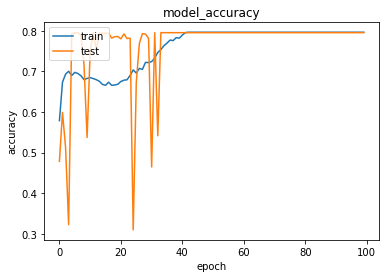

In [61]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [64]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

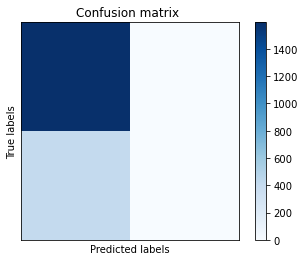

In [67]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [68]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)

In [69]:
score

0.7975

## Hyper parameter Tuning to decide number of Hidden Layers

In [2]:
# Importing Numpy, Matplotlib and Pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing dataset

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
# Creating the dummy values for Geography and Gender column
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [5]:
# Concatenate the Data Frames
X = pd.concat([X, geography, gender], axis = 1)

In [6]:
# Dropping the Original columns because We have generated the dummy values
X = X.drop(["Geography", "Gender"], axis = 1)

In [7]:
# Splitting the data into Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Performing Hyperparameter Optimization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [18]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes,input_dim = X_train.shape[1] ))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    
    model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [19]:
model = KerasClassifier(build_fn=create_model, verbose = 0)

In [20]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers = layers, activation = activations, batch_size = [128, 256], epochs = [30])
grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=5)

In [86]:
pip install scikit-learn==0.21.2

  Created wheel for scikit-learn: filename=scikit_learn-0.21.2-cp38-cp38-win_amd64.whl size=6149079 sha256=b2880f93cd855aba51bc308b860dddc77076228ff671666701e6dbe992425f15
  Stored in directory: c:\users\deepe\appdata\local\pip\cache\wheels\74\11\b6\c7a521de4f5756beb18d8a02a784ed4c2c330353fdf361dbdc
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Python38\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [21]:
grid_result = grid.fit(X_train, Y_train)

In [22]:
print(grid_result.best_score_, grid_result.best_params_)

0.7959999918937684 {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [20]}


In [85]:
import sklearn as sk
sk.__version__

'0.23.1'